<a href="https://colab.research.google.com/github/7tsully/ML_training/blob/master/Copy_of_ML_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 19.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
gauth = GoogleAuth()
gauth.CommandLineAuth()
drive = GoogleDrive(gauth)

InvalidConfigError: ignored

In [0]:
DATADIR = "D:\ML_Datasets\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

FileNotFoundError: ignored

In [0]:
print(img_array.shape)

(375, 500)


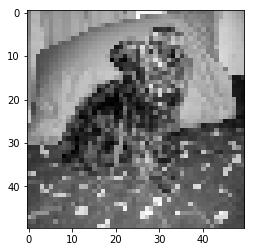

In [0]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
            

In [0]:
print(len(training_data))

24946


In [0]:
import random
random.shuffle(training_data)


In [0]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
1
1
1
0


In [0]:
X = []
Y = []

In [0]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
x = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
X[1]

array([[159, 157, 156, ..., 129, 127, 127],
       [157, 157, 156, ..., 128, 128, 126],
       [149, 151, 154, ..., 128, 126, 127],
       ...,
       [236, 230, 235, ..., 253, 255, 249],
       [242, 238, 237, ..., 252, 232, 132],
       [242, 242, 240, ..., 186, 102, 100]], dtype=uint8)